In [66]:
import pandas as pd

In [67]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [68]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os

In [69]:
df.shape

(907, 27)

In [70]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [71]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [72]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [74]:
df.corr()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
capacity_mw,1.000000,0.051309,0.197129,NaN,0.304087,NaN,NaN,NaN,0.839094,0.844352,0.870620,0.886673,0.901918,NaN,NaN
latitude,0.051309,1.000000,0.036362,NaN,0.129902,NaN,NaN,NaN,0.060330,0.048610,0.041387,0.040568,0.040476,NaN,NaN
longitude,0.197129,0.036362,1.000000,NaN,0.121910,NaN,NaN,NaN,0.013511,0.022760,0.050732,0.048678,0.045599,NaN,NaN
other_fuel3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,0.304087,0.129902,0.121910,NaN,1.000000,NaN,NaN,NaN,0.160014,0.170363,0.193743,0.191367,0.193694,NaN,NaN
wepp_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,0.839094,0.060330,0.013511,NaN,0.160014,NaN,NaN,NaN,1.000000,0.961098,0.937060,0.912561,0.902781,NaN,NaN
generation_gwh_2015,0.844352,0.048610,0.022760,NaN,0.170363,NaN,NaN,NaN,0.961098,1.000000,0.974918,0.940191,0.934371,NaN,NaN


In [75]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [76]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [77]:
import numpy as np

In [78]:
data = df.drop(['longitude','latitude','country','wepp_id','url','country_long','geolocation_source','name','gppd_idnr'],axis = 1)

In [79]:
data.head()

,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,2.5,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,Wind,NaN,NaN,NaN,NaN,AES,CDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,1800.0,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [80]:
data['total_generation'] = + data['generation_gwh_2014'] + data['generation_gwh_2015'] + data['generation_gwh_2016'] + data['generation_gwh_2017']+data['generation_gwh_2018']

In [83]:
data['total_generation'].isnull().sum()

516

In [56]:
data = data.drop(['generation_data_source','generation_gwh_2018','generation_gwh_2019','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017'],axis = 1)

In [84]:
data['total_generation'].fillna(data['total_generation'].mean(), inplace=True) 

In [85]:
data

,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh,total_generation
0,2.5,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488
1,98.0,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488
2,39.2,Wind,NaN,NaN,NaN,NaN,AES,CDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488
3,135.0,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN,3637.554320
4,1800.0,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN,27859.499736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN,13114.831488
903,3.0,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488
904,25.5,Wind,NaN,NaN,NaN,NaN,NaN,CDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488
905,80.0,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488


In [86]:
import seaborn as sns

In [87]:
nlmean=data.mean()

C:\Users\hp\AppData\Local\Temp/ipykernel_17284/355677450.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  nlmean=data.mean()


In [88]:
data.replace("NaN",np.nan,inplace=True)

In [89]:
data

,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh,total_generation
0,2.5,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488
1,98.0,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488
2,39.2,Wind,NaN,NaN,NaN,NaN,AES,CDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488
3,135.0,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN,3637.554320
4,1800.0,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN,27859.499736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN,13114.831488
903,3.0,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488
904,25.5,Wind,NaN,NaN,NaN,NaN,NaN,CDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488
905,80.0,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488


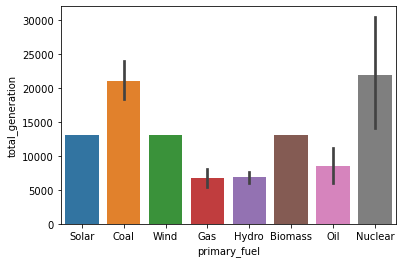

In [90]:
ax = sns.barplot(x="primary_fuel", y="total_generation", data=data)

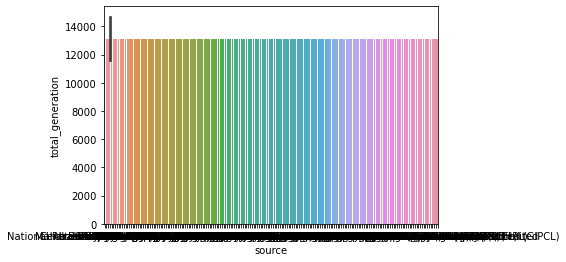

In [94]:
ax = sns.barplot(x="source",y="total_generation" , data=data)

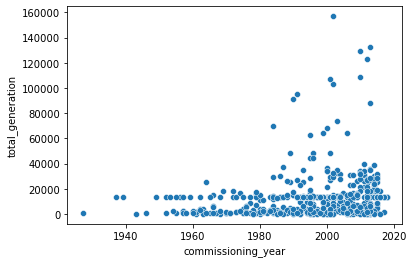

In [96]:
ax = sns.scatterplot(x="commissioning_year", y="total_generation", data=data)

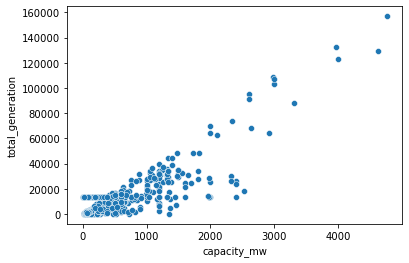

In [97]:
ax = sns.scatterplot(x="capacity_mw", y="total_generation", data=data)

In [98]:
the_mean = data.groupby('primary_fuel').mean()

In [99]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plot

In [100]:
X = the_mean['capacity_mw']
y = the_mean['total_generation']

In [101]:
reg = LinearRegression()
reg = reg.fit(X.values.reshape(-1,1),y)
predictions = reg.predict(X.values.reshape(-1,1))

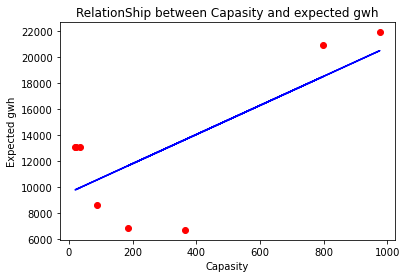

In [102]:
plot.scatter(X, y, color = 'red')
plot.plot(X, predictions, color = 'blue')
plot.title('RelationShip between Capasity and expected gwh')
plot.xlabel('Capasity')
plot.ylabel('Expected gwh')
plot.show()

In [103]:
from sklearn.metrics import r2_score
r2_score(y,predictions)

0.5194274560212708

In [104]:
the_mean = the_mean.sort_values('capacity_mw')

In [105]:
the_mean['weights'] = list(the_mean['total_generation'] / the_mean['capacity_mw'])

In [106]:
the_mean['weights'] = the_mean['weights'] / the_mean['weights'].sum() * 1000

In [107]:
the_mean['the_adjusted_ratio'] = the_mean['weights'] * the_mean['capacity_mw']

In [108]:
the_mean

,capacity_mw,other_fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh,total_generation,weights,the_adjusted_ratio
primary_fuel,,,,,,,,,,,,,,,
Biomass,20.065200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488,353.182310,7086.673679
Solar,21.712598,NaN,2013.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488,326.385334,7086.673679
Wind,33.429675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488,211.987515,7086.673679
Oil,88.942000,NaN,1994.583333,2019.0,NaN,130.881366,21.710086,4.796871,0.167471,0.295215,NaN,NaN,8583.619672,52.148677,4638.207639
Hydro,185.026972,NaN,1988.709163,2019.0,NaN,780.429852,709.991238,699.318079,693.884741,737.636455,NaN,NaN,6861.960332,20.039777,3707.899237
Gas,364.818928,NaN,2002.830508,2019.0,NaN,756.601441,840.159648,826.305503,881.216187,846.658418,NaN,NaN,6702.751543,9.927856,3621.869864
Coal,797.826434,NaN,2006.021164,2019.0,NaN,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635,NaN,NaN,20957.451256,14.194162,11324.477812
Nuclear,975.555556,NaN,1994.250000,2019.0,NaN,4867.556164,4234.875000,4272.608750,4323.415000,4277.031250,NaN,NaN,21907.332903,12.134370,11837.751755


In [109]:
X = the_mean['the_adjusted_ratio']
y = the_mean['total_generation']

In [110]:
reg = LinearRegression()
reg = reg.fit(X.values.reshape(-1,1),y)
predictions = reg.predict(X.values.reshape(-1,1))

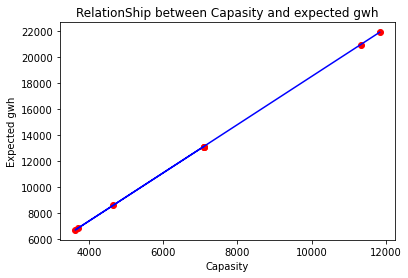

In [111]:
plot.scatter(X, y, color = 'red')
plot.plot(X, predictions, color = 'blue')
plot.title('RelationShip between Capasity and expected gwh')
plot.xlabel('Capasity')
plot.ylabel('Expected gwh')
plot.show()

In [112]:
from sklearn.metrics import r2_score
r2_score(y,predictions)

1.0

In [113]:
dictionary_of_coefficients = dict(zip(the_mean.index, the_mean['the_adjusted_ratio']))

In [114]:
dictionary_of_coefficients

{'Biomass': 7086.673678969901,
 'Solar': 7086.6736789699,
 'Wind': 7086.6736789699,
 'Oil': 4638.20763941603,
 'Hydro': 3707.8992370043507,
 'Gas': 3621.8698639724544,
 'Coal': 11324.477811832065,
 'Nuclear': 11837.751754616222}

In [115]:
data

,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh,total_generation
0,2.5,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488
1,98.0,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488
2,39.2,Wind,NaN,NaN,NaN,NaN,AES,CDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488
3,135.0,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN,3637.554320
4,1800.0,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN,27859.499736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN,13114.831488
903,3.0,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488
904,25.5,Wind,NaN,NaN,NaN,NaN,NaN,CDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488
905,80.0,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488


In [116]:
for index,row in data.iterrows():
    for name in data.primary_fuel.unique():
        if row['primary_fuel'] == name:
            data.loc[index,'predicted_gwh'] = (dictionary_of_coefficients[name] * row['capacity_mw'])
            
from sklearn.metrics import mean_squared_error
mean_squared_error(data['total_generation'], data['predicted_gwh'])

52021242698264.94

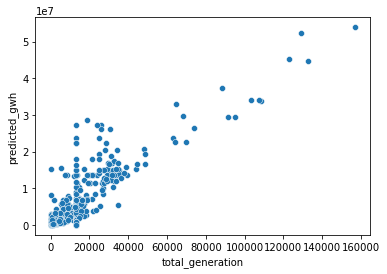

In [117]:
ax = sns.scatterplot(x="total_generation", y="predicted_gwh", data=data)

In [118]:
from sklearn.metrics import r2_score
r2_score(data['total_generation'], data['predicted_gwh'])

-270377.02099795255

In [119]:
dictionary_of_coefficients

{'Biomass': 7086.673678969901,
 'Solar': 7086.6736789699,
 'Wind': 7086.6736789699,
 'Oil': 4638.20763941603,
 'Hydro': 3707.8992370043507,
 'Gas': 3621.8698639724544,
 'Coal': 11324.477811832065,
 'Nuclear': 11837.751754616222}

In [120]:
data

,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh,total_generation,predicted_gwh
0,2.5,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488,1.771668e+04
1,98.0,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488,1.109799e+06
2,39.2,Wind,NaN,NaN,NaN,NaN,AES,CDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488,2.777976e+05
3,135.0,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN,3637.554320,4.889524e+05
4,1800.0,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN,27859.499736,2.038406e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN,13114.831488,1.811916e+07
903,3.0,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488,2.126002e+04
904,25.5,Wind,NaN,NaN,NaN,NaN,NaN,CDM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488,1.807102e+05
905,80.0,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488,9.059582e+05


In [121]:
the_mean = data.groupby('primary_fuel').mean()

In [122]:
the_mean['new_ratios'] = the_mean['predicted_gwh'] / the_mean['total_generation']

In [123]:
the_mean

,capacity_mw,other_fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh,total_generation,predicted_gwh,new_ratios
primary_fuel,,,,,,,,,,,,,,,
Biomass,20.065200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488,1.421955e+05,10.842345
Coal,797.826434,NaN,2006.021164,2019.0,NaN,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635,NaN,NaN,20957.451256,9.034968e+06,431.110045
Gas,364.818928,NaN,2002.830508,2019.0,NaN,756.601441,840.159648,826.305503,881.216187,846.658418,NaN,NaN,6702.751543,1.321327e+06,197.131979
Hydro,185.026972,NaN,1988.709163,2019.0,NaN,780.429852,709.991238,699.318079,693.884741,737.636455,NaN,NaN,6861.960332,6.860614e+05,99.980375
Nuclear,975.555556,NaN,1994.250000,2019.0,NaN,4867.556164,4234.875000,4272.608750,4323.415000,4277.031250,NaN,NaN,21907.332903,1.154838e+07,527.146985
Oil,88.942000,NaN,1994.583333,2019.0,NaN,130.881366,21.710086,4.796871,0.167471,0.295215,NaN,NaN,8583.619672,4.125315e+05,48.060315
Solar,21.712598,NaN,2013.375000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488,1.538701e+05,11.732526
Wind,33.429675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13114.831488,2.369052e+05,18.063915


In [124]:
dictionary_of_coefficients

{'Biomass': 7086.673678969901,
 'Solar': 7086.6736789699,
 'Wind': 7086.6736789699,
 'Oil': 4638.20763941603,
 'Hydro': 3707.8992370043507,
 'Gas': 3621.8698639724544,
 'Coal': 11324.477811832065,
 'Nuclear': 11837.751754616222}

In [125]:
for name in the_mean.index:
    dictionary_of_coefficients[name] =  dictionary_of_coefficients[name] / the_mean.loc[name,'new_ratios']

In [127]:
dictionary_of_coefficients

{'Biomass': 653.6108031853471,
 'Solar': 604.0194375287316,
 'Wind': 392.3110699644148,
 'Oil': 96.50805774199239,
 'Hydro': 37.086270467967694,
 'Gas': 18.372817409576847,
 'Coal': 26.26818360461509,
 'Nuclear': 22.456263795688983}

In [128]:
for index,row in data.iterrows():
    for name in data.primary_fuel.unique():
        if row['primary_fuel'] == name:
            data.loc[index,'predicted_gwh'] = (dictionary_of_coefficients[name] * row['capacity_mw'])
            
from sklearn.metrics import mean_squared_error
mean_squared_error(data['total_generation'], data['predicted_gwh'])

318598032.98243743

In [129]:
from sklearn.metrics import r2_score
r2_score(data['total_generation'], data['predicted_gwh'])

-0.6558986518502552